# The Delta Method (Univariate)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

# Contents of this note
## 1. Introduction to the Delta Method
## 2. Examples with different distributions
### - Normal Distribution 
### - Exponential Distribution

# Part 1 - Introduction to the Delta Method
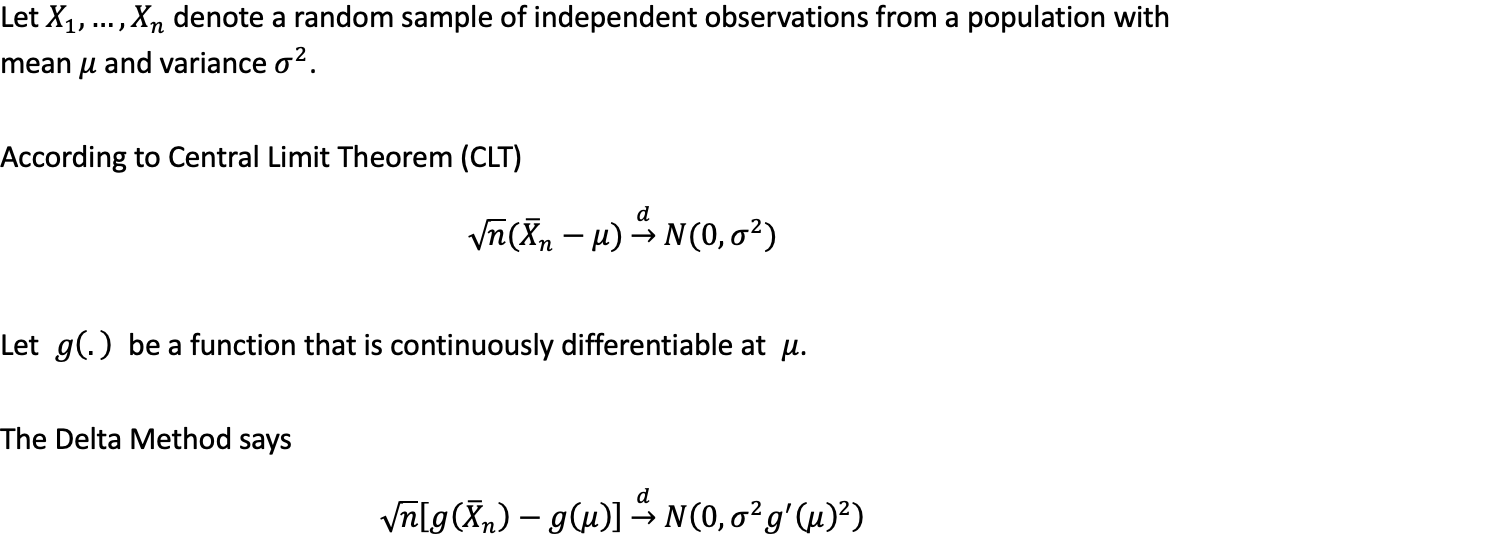

# Part 2 - Examples from different distributions
### In these examples,  we consider random variables that are functions of another random variables with known distribution, including the true values of the parameters). The variances of these random variabels are calculated. We compare the theoretical variance (based on the Delta method) with the simulation-based variances.

### 1) Two distributions (of the original random variables) are consider: Normal and Exponential
### 2) Three functions (applied to the original random variable to generate a new random variable) are considered: 
- ### g(x)=2x 
- ### g(x)=1/x
- ### g(x)=x^2

### Specify the number of experiments, and the sample size. These are global settings.

In [2]:
n_experiment = 1000
sample_size  = 1000

## Example 1. Delta Method with Normal Distribution

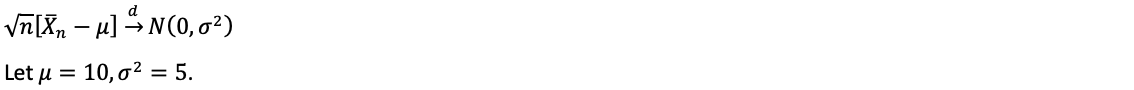

In [3]:
mu     = 10
sigma2 = 5
population = np.random.normal(mu,np.sqrt(sigma2),100000)

In [4]:
sample_mean = [np.nan]*n_experiment
for i in range(n_experiment):
    sample_now     = np.random.choice(population, size=sample_size,replace=True)
    sample_mean[i] = np.mean(sample_now)

Calculate the statistic based on the Delta Method
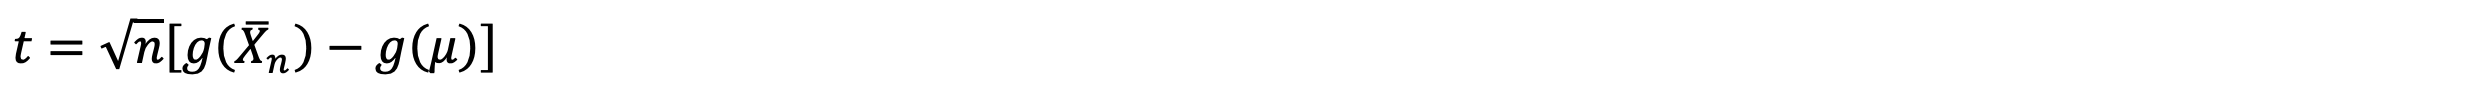

In [5]:
Theoretical_mean = mu
series_1 = [np.sqrt(sample_size)*(sample_mean[i]-Theoretical_mean) for i in range(n_experiment)]
series_2 = [np.sqrt(sample_size)*(2*sample_mean[i]-2*Theoretical_mean) for i in range(n_experiment)]
series_3 = [np.sqrt(sample_size)*(1/sample_mean[i]-1/Theoretical_mean) for i in range(n_experiment)]
series_4 = [np.sqrt(sample_size)*(sample_mean[i]**2-Theoretical_mean**2) for i in range(n_experiment)]

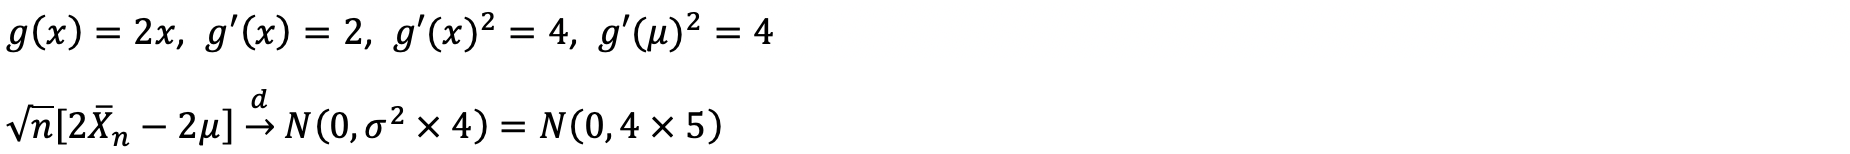

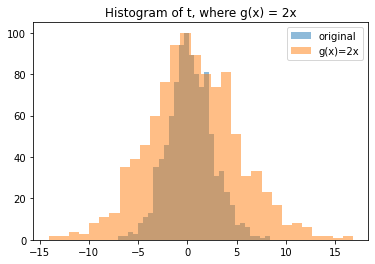

Theoretical Variance: 20
Sample Variance: 21.175


In [6]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_2,alpha=0.5,bins=30,label = 'g(x)=2x')
plt.title('Histogram of t, where g(x) = 2x')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(4*sigma2))
print("Sample Variance: " + str(round(np.var(series_2,ddof=1),3)))

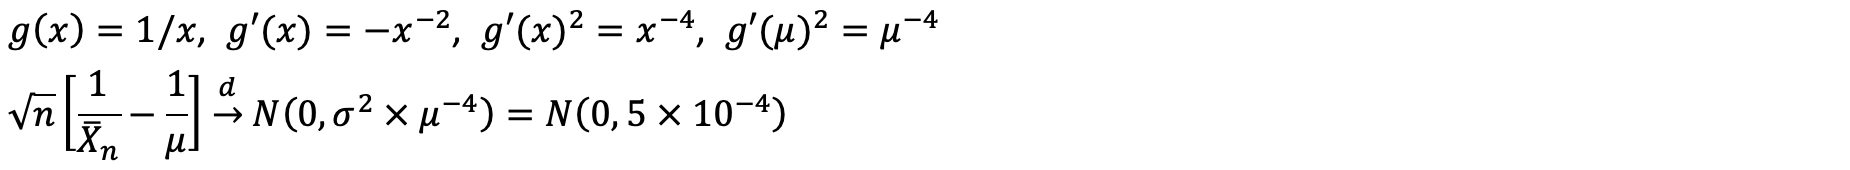

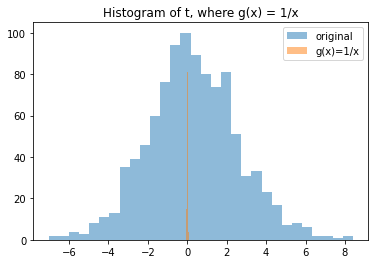

Theoretical Variance: 0.0005
Sample Variance: 0.00053


In [7]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_3,alpha=0.5,bins=30,label = 'g(x)=1/x')
plt.title('Histogram of t, where g(x) = 1/x')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(sigma2*mu**(-4)))
print("Sample Variance: " + str(round(np.var(series_3,ddof=1),5)))

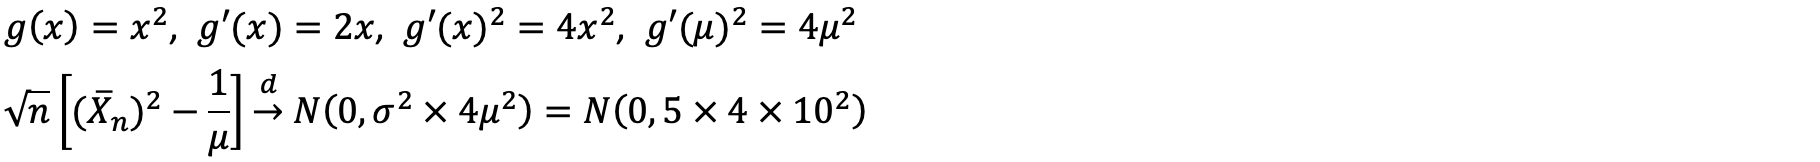

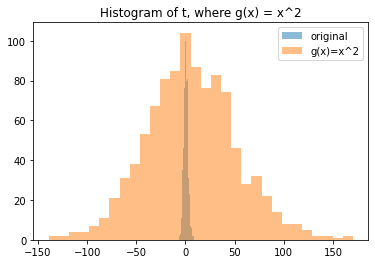

Theoretical Variance: 2000
Sample Variance: 2123.35329


In [8]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_4,alpha=0.5,bins=30,label = 'g(x)=x^2')
plt.title('Histogram of t, where g(x) = x^2')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(sigma2*4*mu**(2)))
print("Sample Variance: " + str(round(np.var(series_4,ddof=1),5)))

## Example 2. Delta Method with Exponential Distribution
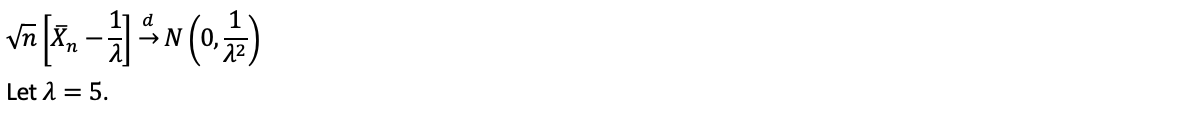

In [9]:
Lambda = 5

In [10]:
##### In np.random.exponential, to create a sample of Exp(Lambda), using scale = 1/Lambda
population = np.random.exponential(scale = 1/Lambda,size= 100000)

In [11]:
sample_mean = [np.nan]*n_experiment
for i in range(n_experiment):
    sample_now = np.random.choice(population, size=sample_size,replace=True)
    sample_mean[i] = np.mean(sample_now)

Calculate the statistic based on the Delta Method
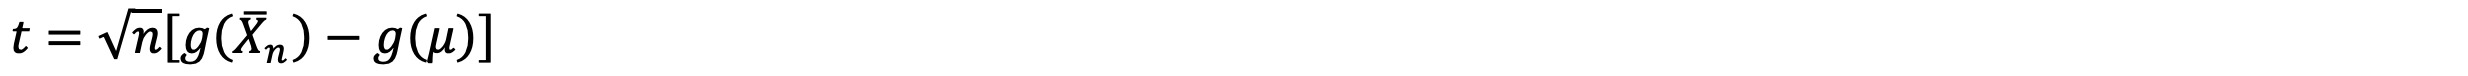

In [12]:
Theoretical_mean = 1/Lambda
series_1 = [np.sqrt(sample_size)*(sample_mean[i]-Theoretical_mean) for i in range(n_experiment)]
series_2 = [np.sqrt(sample_size)*(2*sample_mean[i]-2*Theoretical_mean) for i in range(n_experiment)]
series_3 = [np.sqrt(sample_size)*(1/sample_mean[i]-1/Theoretical_mean) for i in range(n_experiment)]
series_4 = [np.sqrt(sample_size)*(sample_mean[i]**2-Theoretical_mean**2) for i in range(n_experiment)]

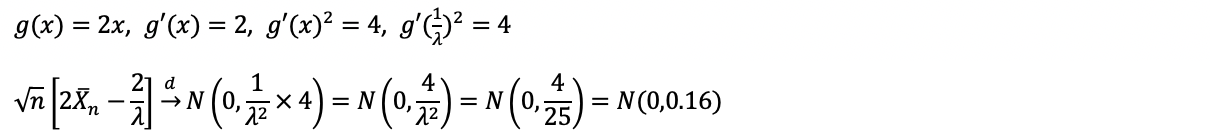

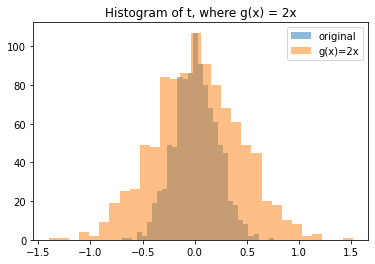

Theoretical Variance: 0.16
Sample Variance: 0.167


In [13]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_2,alpha=0.5,bins=30,label = 'g(x)=2x')
plt.title('Histogram of t, where g(x) = 2x')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(round((4*(1/Lambda)**2),3)))
print("Sample Variance: " + str(round(np.var(series_2,ddof=1),3)))

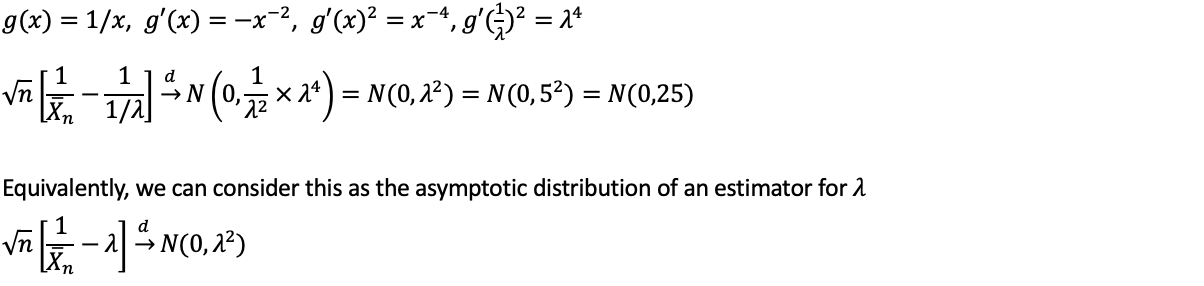

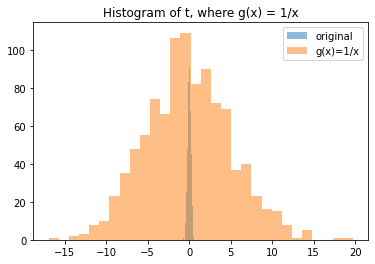

Theoretical Variance: 25
Sample Variance: 26.164


In [14]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_3,alpha=0.5,bins=30,label = 'g(x)=1/x')
plt.title('Histogram of t, where g(x) = 1/x')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(Lambda**2))
print("Sample Variance: " + str(round(np.var(series_3,ddof=1),3)))

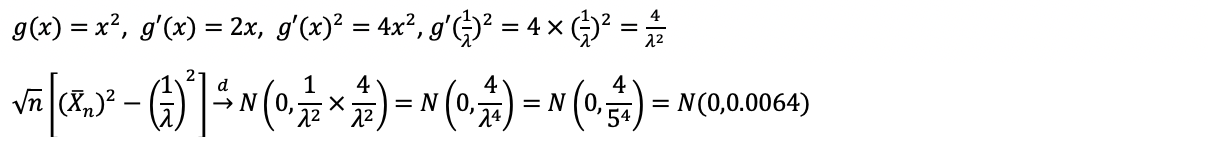

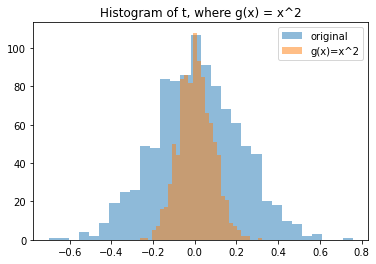

Theoretical Variance: 0.0064
Sample Variance: 0.007


In [15]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_4,alpha=0.5,bins=30,label = 'g(x)=x^2')
plt.title('Histogram of t, where g(x) = x^2')
plt.legend()
plt.show()

print("Theoretical Variance: " + str(4/(Lambda**4)))
print("Sample Variance: " + str(round(np.var(series_4,ddof=1),3)))